In [1]:
import os 
import pandas as pd 
import dataPrep as dP 
import matplotlib.pyplot as plt 
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


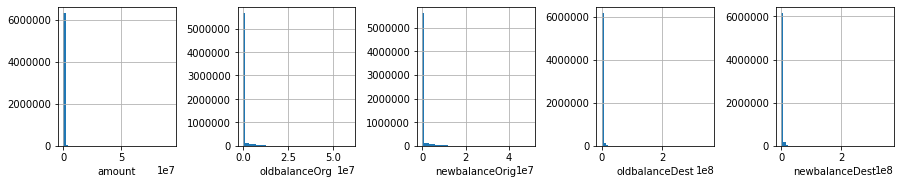

In [2]:
#Get the data and visualize them prior to transformation
x_train,targetsActual,targetsFlagged = dP.getData()
#print(x_train.info())
plt.figure(1,figsize = (50,50))
i = 1; nrows = 20; ncols = 20
for col in x_train.columns:
    if col in ['step','nameOrig','nameDest','type']:
        continue
    plt.subplot(nrows,ncols,i)
    x_train[col].hist(bins = 50)
    plt.xlabel(col)
    i += 1
plt.tight_layout()
plt.show()    

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest     Logamount  LogoldbalanceOrg  \
count    6.362620e+06    6.362620e+06  6.362620e+06      6.362620e+06   
mean     1.100702e+06    1.224996e+06  1.084252e+01      8.178673e+00   
std      3.399180e+06    3.674129e+06  1.809876e+00      4.691891e+00   
min      0.000000e+00    0.000000e+00  2.302585e+00      2.302585e+00   
25%      0.000000e+00 

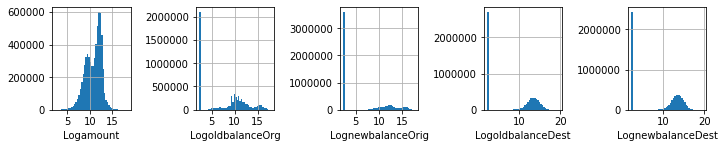

In [3]:
#Transform and look at the values
import numpy as np
def logx(x):
    return np.log(1 + x)
for col in x_train.columns:
    if col in ['step','nameOrig','nameDest','type']:
        continue
    x_train['Log' + col] = x_train[col].apply(logx)
print(x_train.describe())
x_train.drop(columns = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'],inplace = True)
plt.figure(1,figsize = (50,50))
i = 1; nrows = 25; ncols = 25
for col in x_train.columns:
    if 'Log' not in col:
        continue 
    plt.subplot(nrows,ncols,i)
    x_train[col].hist(bins = 50)
    plt.xlabel(col)
    i += 1
plt.tight_layout()
plt.show()

In [10]:
#Normalize the numerical features after log transformation
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numericalColumns = ['Amount','OldBalanceOrig','NewBalanceOrig','OldBalanceDest','NewBalanceDest']
logColumns = ['Logamount','LogoldbalanceOrg','LognewbalanceOrig','LogoldbalanceDest','LognewbalanceDest']
x_train[numericalColumns] = scaler.fit_transform(x_train[logColumns])
x_train.info()
x_train.describe()
x_train.drop(logColumns,inplace = True)
plt.figure(1,figsize = (50,50))
i = 1; nrows = 25; ncols = 25
for col in numericalColumns:
    plt.subplot(nrows,ncols,i)
    x_train[col].hist(bins = 50)
    plt.xlabel(col)
    i += 1
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 14 columns):
 #   Column             Dtype  
---  ------             -----  
 0   step               int64  
 1   type               object 
 2   amount             float64
 3   nameOrig           object 
 4   oldbalanceOrg      float64
 5   newbalanceOrig     float64
 6   nameDest           object 
 7   oldbalanceDest     float64
 8   newbalanceDest     float64
 9   Logamount          float64
 10  LogoldbalanceOrg   float64
 11  LognewbalanceOrig  float64
 12  LogoldbalanceDest  float64
 13  LognewbalanceDest  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 679.6+ MB
